# Monte-Carlo Simulation

## Aufgabenstellung

Wir betrachten weiter den Federspeicher aus Assignment 1. Diesmal simulieren wir die Ergebnisse der Fertigung für $N=10.000$ Zylinder. In diesem Assignment kommt die Federrate dazu. Das Federpaket besteht aus 24 Einzelfedern, die ineinander gesteckt auf dem Umfang des Zylinder verteilt sind. Die Toleranzen der Federn sind recht groß. Die Federn sind nominal

- $c_1 = (100 \pm 20)\, \mathrm{N/mm}$ 
- $c_2 = (150 \pm 30)\, \mathrm{N/mm}$ 
- $c_3 = (200 \pm 40)\, \mathrm{N/mm}$ 

Die Gesamtfederrate ergibt sich als

\begin{equation}
c = \sum_{i=1}^{3} \sum_{j=1}^{8} c_{i,j}
\end{equation}

Die geometrischen Eigenschaften entspricht dem ersten Assignment:

 - Deviation $d$/mm: Gleichverteilt, $[-0.05, 0.05]\,\mathrm{mm}$
 - Deviation $h_{1}$/mm: Gleichverteilt, $[-0.05, 0.05]\,\mathrm{mm}$
 - Deviation $h_{2}$/mm: Gleichverteilt, $[-0.05, 0.05]\,\mathrm{mm}$
 - Dev. $l$/mm: Gleichverteilt, $[-0.05, 0.05]\,\mathrm{mm}$

Mit diesen Abweichungen vom Mittelwert ergibt sich die Kraft des Federspeichers als

\begin{equation}
F = c(1 + h_1 + h_2 + l + d)
\end{equation}

Fragestellungen:

1. Federpaket:
   - a. Wie verhält sich das Federpaket im nominalen Zustand? Simuliert dazu $N=10^4$ stochastisch unabhängige Einzelfedern und bestimmt die Federrate des Federpakets.
   - b. Die Federn $c_2$ liegt innerhalb der Toleranzen mit $c_3 < 200 \, \mathrm{N/mm}$. Wie ändert sich die Federrate?
2. Federspeicherzylinder: Welche Verteilungen ergeben sich für die Federspeicherzylinder mit Federpakete nach a. bzw. b.? Wie entwickelt sich der Anteil der konformen Einheiten ($F_{min} = 18 \,\mathrm{kN}$)?

Beantwortet die Fragestellungen in einem technischen Bericht mit Einleitung, Analyse und Beantwortung der Fragen.

## Einleitung

Um den Einfluss der Toleranzen auf die anzahl der Konformen Einheiten zu ermitteln werden N=10^5 Federspeicher simuliert, indem drei Feder Pakete von S=8 randomisiert mit gleichmäßiger Verteilung simuliert werden. 
Im ersten Schritt werden die Federn im nominalen Bereich simuliert (c1, c2 und c3a), danach Folgt die Halbierung des Toleranzbereichs für die Federn c3 (c3b). 
Die zugehörigen Federspeicher Kräfte werden für beide Fälle ermittelt. 

## Analyse
### Setup

Zuerst werden die notwendigen Libraries geladen

In [187]:
# Numpy for higher level mathematics
import numpy as np
# Matplotlib and the pyplot module for a Matlab-like plot syntax
import matplotlib
# This is the syntax to import as a named module
import matplotlib.pyplot as plt
# Plot the graphs in the notebook
%matplotlib inline
import math

### 1a) Simulation von N=10^4 stochastisch unabhängigen Einzelfedern, bestimmung der Federrate des Paketes

Die Federn 1 bis 3 werden in ihren Toleranzbereichen mit einer Gleichmäßigen Verteilung simuliert.
Für die Federrate ergibt sich eine Normalverteilung mit einem Erwartungswert von etwa 3600 N/mm (Entspricht der Nominalen Federrate des Paketes) 
Die Standard Abweichung liegt bei etwa 88 N/mm (Genaue Werte für die jeweiligen experimente sind im Folgenden Abschnitt zu finden. 

𝑐1=(100±20)N/mm 
𝑐2=(150±30)N/mm 
𝑐3=(200±40)N/mm


 Erwartungswert 3600.0 N/mm 
 Varianz 7683.0 (N/mm)^2 
 => Standard Deviation 88.0 N/mm


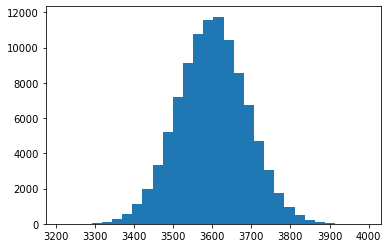

In [188]:
N = 100000 #Anzahl Federspeicher
P = 8 #Anzahl Federn Pro Paket 
# Random number generator
rng = np.random.default_rng()

c1 = rng.uniform(low = 80, high = 120, size = (N,P))
c2 = rng.uniform(low = 120, high = 180, size = (N,P))
c3a = rng.uniform(low = 160, high = 240, size = (N,P))
ca = np.sum(c1, axis = 1)+np.sum(c2, axis = 1)+np.sum(c3a, axis = 1)

plt.hist(ca, bins = 30)

avg_ca=np.mean(ca)
var_ca=np.var(ca)
std_ca=np.std(ca)

print(' Erwartungswert', np.round(avg_ca), 'N/mm \n Varianz', np.round(var_ca), '(N/mm)^2 \n => Standard Deviation', np.round(std_ca),'N/mm')


### 1b) c2=200-40N/mm

Die Einschränkung des Toleranzbereichs auf Werte unter 200N/mm für die dritte Feder führt
- zu einer verringerung des Erwartungswertes um etwa 160 N/mm=8x20N/mm was genau der Halbierung des Toleranzfensters (1/2x40N/mm) entspricht.
- zu einer Verringerung der Standardvariation um etwa 20 N/mm

 Erwartungswert 3440.0 N/mm ( 160.0 )  
 Varianz 4560.0 (N/mm)^2 
 => Standard Deviation 68.0 N/mm ( 20.0 )


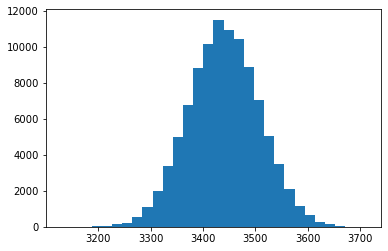

In [189]:
c3b = rng.uniform(low = 160, high = 200, size = (N,P))
cb = np.sum(c1, axis = 1)+np.sum(c2, axis = 1)+np.sum(c3b, axis = 1)

plt.hist(cb, bins = 30)

avg_cb=np.mean(cb)
var_cb=np.var(cb)
std_cb=np.std(cb)

print(' Erwartungswert', np.round(avg_cb),'N/mm (',np.round(avg_ca-avg_cb),')  \n Varianz',np.round(var_cb), '(N/mm)^2 \n => Standard Deviation', np.round(std_cb),'N/mm (',np.round(std_ca-std_cb),')')



### 2 a) mit c3=200+-40 N/mm

Im Nominalen zustand liegt der Anteil an Konformen Federspeichern bei etwa 72% und der Erwartungswert bei 18700N 


Der Erwartungswert 18720.0 N liegt etwas über 18kN 

72.361 % der Federspeicher liegen oberhalb des mindest Wertes von 18kN 

99% der Federspeicher liegen zwischen 15197.0 N und 22243.0 N 


 Varianz 1379027.0 N^2 
 => Standard Deviation 1174.0 N


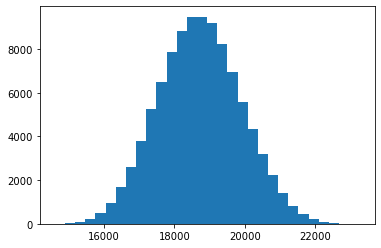

In [190]:
d = rng.uniform(low = -0.05, high =0.05, size = N)
h1 = rng.uniform(low = -0.05, high =0.05, size = N)
h2 = rng.uniform(low = -0.05, high =0.05, size = N)
l= rng.uniform(low = -0.05, high =0.05, size = N)
i=2.6
Fa=c*2*i*(1+d+h1+h2+l)

plt.hist(Fa, bins = 30)

avg_Fa=np.mean(Fa)
var_Fa=np.var(Fa)
std_Fa=np.std(Fa)
realm_Fa=np.mean(Fa) - 3*np.std(Fa)
realp_Fa=np.mean(Fa) + 3*np.std(Fa)

print('Der Erwartungswert', np.round(avg_Fa), 'N liegt etwas über 18kN \n')
print(len(Fa[Fa>18000])*100/N, '% der Federspeicher liegen oberhalb des mindest Wertes von 18kN \n')
print('99% der Federspeicher liegen zwischen', np.round(realm_Fa), 'N und', np.round(realp_Fa),'N \n')

print('\n Varianz', np.round(var_Fa), 'N^2 \n => Standard Deviation', np.round(std_Fa),'N')

### 2 b) mit c3=200-40 N/mm

Wird der Toleranzbereich von c3 halbiert, liegt der Erwartungswert bei unter 18kN (17800N), der Anteil an Konformen Federspeichern sinkt auf etwa 45%

Der Erwartungswert 17888.0 N liegt etwas unter 18kN 

45.692 % der Federspeicher liegen oberhalb des mindest Wertes von 18kN 

99% der Federspeicher liegen zwischen 14609.0 N und 21167.0 N 

Varianz 1194691.0 N^2 
 => Standard Deviation 1093.0 N


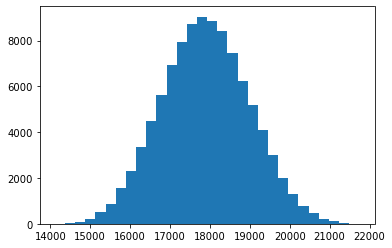

In [191]:
Fb=cb*2*i*(1+d+h1+h2+l)

plt.hist(Fb, bins = 30)

avg_Fb=np.mean(Fb)
var_Fb=np.var(Fb)
std_Fb=np.std(Fb)
realm_Fb=np.mean(Fb) - 3*np.std(Fb)
realp_Fb=np.mean(Fb) + 3*np.std(Fb)

print('Der Erwartungswert', np.round(avg_Fb), 'N liegt etwas unter 18kN \n')
print(len(Fb[Fb>18000])*100/N, '% der Federspeicher liegen oberhalb des mindest Wertes von 18kN \n')
print('99% der Federspeicher liegen zwischen', np.round(realm_Fb), 'N und', np.round(realp_Fb),'N \n')

print('Varianz', np.round(var_Fb), 'N^2 \n => Standard Deviation', np.round(std_Fb),'N')

## Ergebnisse
### 1 a)
Wie verhält sich das Federpaket im nominalen Zustand? Simuliert dazu mindestens 𝑁=10^4  stochastisch unabhängige Einzelfedern und bestimmt die Federrate des Federpakets.

Anzahl simulierter Federsets 100000
Die mittlere Federrate beträgt 3600.0 N/mm (Erwartungswert) 
und weicht im Mittel um 88.0 N/mm ab (Standard Deviation)


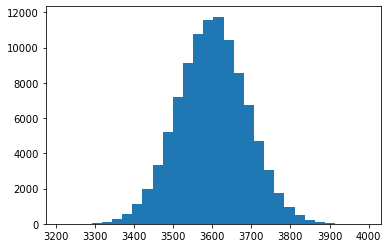

In [192]:
plt.hist(ca, bins = 30)

print('Anzahl simulierter Federsets', N)
print('Die mittlere Federrate beträgt', np.round(avg_ca), 'N/mm (Erwartungswert) \nund weicht im Mittel um', np.round(std_ca),'N/mm ab (Standard Deviation)')



### 1 b)
Die Federn  𝑐2  liegt innerhalb der Toleranzen mit  𝑐3<200N/mm . Wie ändert sich die Federrate?

Die mittlere Federrate beträgt 3440.0 N/mm (Erwartungswert) 
und weicht im Mittel um 68.0 N/mm ab (Standard Deviation)
im Vergleich zu 1a ist... 
...die mittlere Federrate von 3600.0 um 160.0 gesunken
...die Standard Deviation ist von 88.0 um 20.0 gesunken (Die Werte liegen nun enger beieinander)


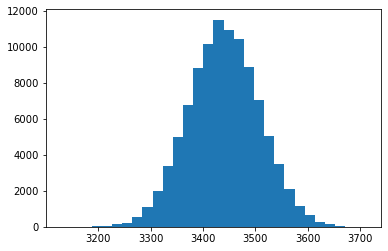

In [193]:
plt.hist(cb, bins = 30)
print('Die mittlere Federrate beträgt', np.round(avg_cb), 'N/mm (Erwartungswert) \nund weicht im Mittel um', np.round(std_cb),'N/mm ab (Standard Deviation)')
print('im Vergleich zu 1a ist... \n...die mittlere Federrate von', np.round(avg_ca), 'um', np.round(avg_ca)-np.round(avg_cb), 'gesunken')
print('...die Standard Deviation ist von',np.round(std_ca), 'um', np.round(std_ca-std_cb),'gesunken (Die Werte liegen nun enger beieinander)')

### 2 
Welche Verteilungen ergeben sich für die Federspeicherzylinder mit Federpakete nach a. bzw. b.? Wie entwickelt sich der Anteil der konformen Einheiten ( 𝐹𝑚𝑖𝑛=18kN )?



Fall a (Blau): 
Der Erwartungswert 18720.0 N liegt etwas über 18kN
27.639 % der Federspeicher mit c3=200N/mm +-40 N/mm liegen unterhalb des mindest Wertes von 18kN  und sind somit Ausschuss
Fall b (Orange): 
Der Erwartungswert 17888.0 N liegt etwas unter 18kN
54.308 % der Federspeicher mit c3=200N/mm -40 N/mm liegen unterhalb des mindest Wertes von 18kN und sind somit Ausschuss


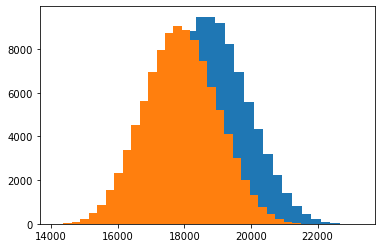

In [218]:
plt.hist(Fa, bins = 30)
plt.hist(Fb, bins = 30)

print('Fall a (Blau): \nDer Erwartungswert', np.round(avg_Fa), 'N liegt etwas über 18kN')
print(len(Fa[Fa<18000])*100/N, '% der Federspeicher mit c3=200N/mm +-40 N/mm liegen unterhalb des mindest Wertes von 18kN  und sind somit Ausschuss')


print('Fall b (Orange): \nDer Erwartungswert', np.round(avg_Fb), 'N liegt etwas unter 18kN')
print(len(Fb[Fb<18000])*100/N, '% der Federspeicher mit c3=200N/mm -40 N/mm liegen unterhalb des mindest Wertes von 18kN und sind somit Ausschuss')
